In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 

In [2]:
path= "C:\\Users\\hp\\Desktop\\nifty50-stock-market-data\\RELIANCE.csv"
df=pd.read_csv(path, index_col='Date', parse_dates=True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
#I don't need some columns for my project such as Symbol, Series and others so I'm deleting those columns
f_df=df.drop(columns=['Symbol', 'Series', 'Prev Close', 'Last', 'VWAP', 'Turnover','Trades','Deliverable Volume','%Deliverble'])

In [4]:
f_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,237.50,251.70,237.50,251.70,4456424
2000-01-04,258.40,271.85,251.30,271.85,9487878
2000-01-05,256.65,287.90,256.65,282.50,26833684
2000-01-06,289.00,300.70,289.00,294.35,15682286
2000-01-07,295.00,317.90,293.00,314.55,19870977


In [5]:
#Checking that either any null or np.nan value available in the Dataset
f_df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
#Checking Data Types of all the labels
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5059 entries, 2000-01-03 to 2020-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5059 non-null   float64
 1   High    5059 non-null   float64
 2   Low     5059 non-null   float64
 3   Close   5059 non-null   float64
 4   Volume  5059 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 237.1 KB


In [7]:
f_df['Volume'].astype(float)

Date
2000-01-03     4456424.0
2000-01-04     9487878.0
2000-01-05    26833684.0
2000-01-06    15682286.0
2000-01-07    19870977.0
                 ...    
2020-04-24    61711388.0
2020-04-27    26736512.0
2020-04-28    35866381.0
2020-04-29    17141540.0
2020-04-30    32617901.0
Name: Volume, Length: 5059, dtype: float64

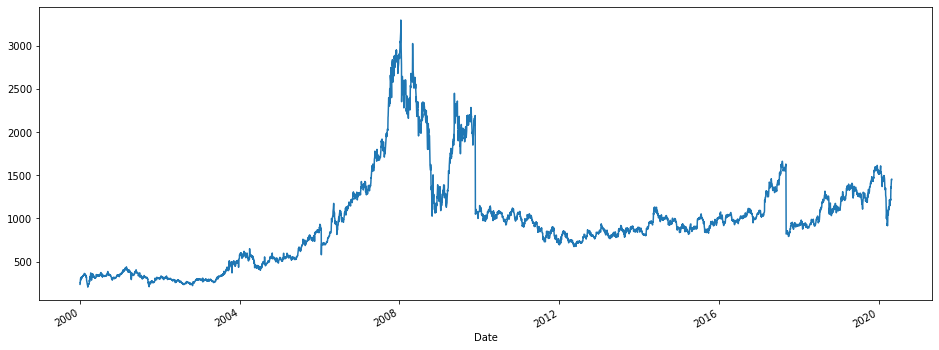

In [9]:
f_df['Open'].plot(figsize=(16,6));

In [10]:
#Checking mean of the dataframe by looking its previous 7 days performance
f_df.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN
2000-01-11,280.271429,294.242857,273.800000,287.421429,1.461323e+07
2000-01-12,287.628571,301.857143,280.178571,294.564286,1.570653e+07
2000-01-13,294.428571,308.221429,287.721429,300.278571,1.679055e+07


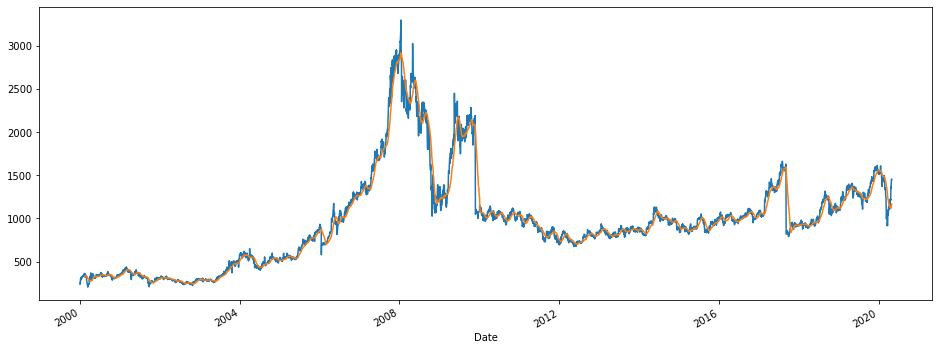

In [12]:
f_df['Open'].plot(figsize=(16,6))
f_df.rolling(window=30).mean()['Close'].plot();

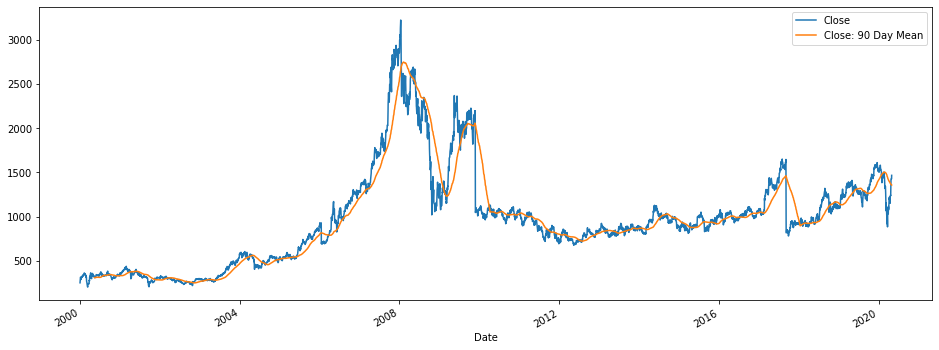

In [14]:
f_df['Close: 90 Day Mean'] = f_df['Close'].rolling(window=90).mean()
f_df[['Close','Close: 90 Day Mean']].plot(figsize=(16,6));

In [15]:
training_set=f_df['Open']
training_set=pd.DataFrame(training_set)

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [32]:
# Initialising the RNN
regressor = Sequential()

In [33]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [34]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 4.3666e-04
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 1.5156e-04
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 1.2088e-04
Epoch 4/100
1198/1198 [==============================] - 7s 5ms/step - loss: 1.2003e-04
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 1.1006e-04
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 9.2691e-05
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 1.0115e-04
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 8.3808e-05
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 8.6659e-05
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 7.7007e-05
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 8.2800e-05
Epoch 12/100
1198/1198 [======

In [35]:
#using year 2020 (From 01/01/2020 to 30/04/2020) data set as test_data_set in order to predict the trend of Stock Market of Reliance Industries
test_path='C:\\Users\hp\\Desktop\\RELIANCE_test.csv'

# Getting the real stock price of 2020
dataset_test = pd.read_csv(test_path,index_col="Date",parse_dates=True)

In [36]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [37]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,1518.0,1527.10,1505.5,1509.60,6402372
2020-02-01,1512.0,1540.95,1512.0,1535.30,8096561
2020-03-01,1533.0,1541.65,1523.0,1537.15,9593498
2020-06-01,1520.0,1527.90,1498.0,1501.50,11209343
2020-07-01,1519.0,1534.50,1513.5,1524.60,7627191


In [38]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2020-01-01 to 2020-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    82 non-null     float64
 1   High    82 non-null     float64
 2   Low     82 non-null     float64
 3   Close   82 non-null     float64
 4   Volume  82 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 3.8 KB


In [39]:
#Converting volume datatype from int to Float to make all the data of same type.
dataset_test['Volume'].astype(float)

Date
2020-01-01     6402372.0
2020-02-01     8096561.0
2020-03-01     9593498.0
2020-06-01    11209343.0
2020-07-01     7627191.0
                 ...    
2020-04-24    61711388.0
2020-04-27    26736512.0
2020-04-28    35866381.0
2020-04-29    17141540.0
2020-04-30    32617901.0
Name: Volume, Length: 82, dtype: float64

In [41]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [42]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2020-01-01 to 2020-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    82 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [54]:
len(dataset_total)

5141

In [55]:
# Getting the predicted stock price of 2020
dataset_total = pd.concat((f_df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 142):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [56]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       82 non-null     float32
dtypes: float32(1)
memory usage: 456.0 bytes


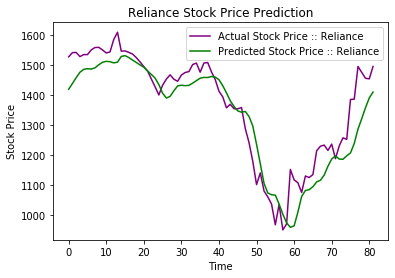

In [57]:
# Final result predicting the stock price of Reliance Industries

plt.plot(real_stock_price, color = 'Purple', label = 'Actual Stock Price :: Reliance')
plt.plot(predicted_stock_price, color = 'Green', label = 'Predicted Stock Price :: Reliance')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()